In [1]:
!pip install numpy torch torchvision matplotlib gymnasium

In [2]:
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import matplotlib.pyplot as plt
import numpy as np

In [13]:
env = gym.make('FrozenLake-v1', is_slippery = True)

Number: 1000 Sum: 42.0


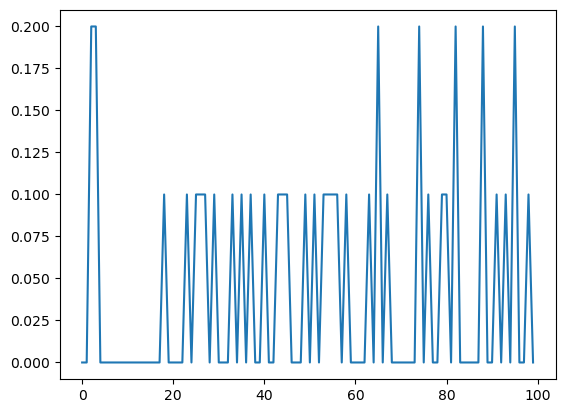

In [14]:
action = None
# 1000 Games
game_results = []
win_percentages = []
number_games = 1000

# LEFT = 0 DOWN = 1 RIGHT = 2 UP = 3

# SFFF  0  1  2  3
# FHFH  4  5  6  7
# FFFH  8  9 10 11
# HFFG 12 13 14 15

policy = {0: 1, 1: 2, 2: 1, 3: 0, 4: 1, 6: 1, 8: 2, 9: 2, 10: 1, 13: 2, 14: 2}

for i in range(number_games):
    terminated = False
    truncated = False
    observation, info = env.reset()
    score = 0
    while not terminated and not truncated:
        action = policy[observation]
        observation, reward, terminated, truncated, info = env.step(action)

        score += reward
    
    game_results.append(score)
    env.reset()
    
    if i % 10 == 0:
        average = np.mean(game_results[-10:])
        win_percentages.append(average)
     
print(f'Number: {len(game_results)} Sum: {sum(game_results)}')
plt.plot(win_percentages)
plt.show()
